## Toturial_Loan Price Prediction_3

### 1.Import Libraries And Load

In [123]:
# Import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [124]:
#Read the test and train data using the pandas
url1 ='https://raw.githubusercontent.com/Kamin-At/Loan_prediction/master/data/train_ctrUa4K.csv'
train=pd.read_csv(url1)
train.head().reset_index(drop=True).style.set_properties(**{'background-color': 'pink','color':'black','border-color': 'blue'})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [125]:
#Read the test data using the
url2 = 'https://raw.githubusercontent.com/Kamin-At/Loan_prediction/master/data/test_lAUu6dG.csv'
test=pd.read_csv(url2)
test.head().reset_index(drop=True).style.set_properties(**{'background-color': 'blue','color':'black','border-color': 'black'})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000000,360.000000,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000000,360.000000,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000000,360.000000,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000000,360.000000,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000000,360.000000,1.000000,Urban


In [126]:
# train data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [127]:
# test dataset information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [128]:
# train dataset describe
train.describe().style.highlight_between(right =1.5, axis =1, props ='color:Red; background-color:black;')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [129]:
# test dataset describe
test.describe().style.background_gradient(cmap =sns.light_palette('blue',as_cmap= True, input='rgb'))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [130]:
# Corelation of the train dataset
corr = train.corr().style.highlight_max(axis=1, props='color: white, font-weight:bold, backgroud-color:darkblue;')
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [131]:
# corelation of the testdataset
test_corr = test.corr().style.highlight_max(axis =1, props='color: white; font-weight:bold; background-color:green;')
test_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000


## Check the null valies of the train test dataset


In [132]:
# Check null values in the train dataset
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
## fill the null values wwith mean and max values
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())

train.Credit_History = train.Credit_History.fillna(train.Credit_History.mean())

train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())

train['Gender'].fillna(train['Gender'].value_counts().idxmax(), inplace =True)
 
train['Married'].fillna(train['Married'].value_counts().idxmax(), inplace =True)
train.Dependents.fillna(train.Dependents.value_counts().idxmax(), inplace =True)

train.Self_Employed.fillna(train.Self_Employed.value_counts().idxmax(), inplace =True)

In [134]:
# Check the null values in the test dataset
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [135]:
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

test.Credit_History = test.Credit_History.fillna(test.Credit_History.mean())
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())

test['Gender'].fillna(test['Gender'].value_counts().idxmax(), inplace =True)
test['Married'].fillna(test['Married'].value_counts().idxmax(), inplace =True)

test.Dependents.fillna(test.Dependents.value_counts().idxmax(),inplace =True)

test.Self_Employed.fillna(test.Self_Employed.value_counts().idxmax(), inplace =True)

In [136]:
# Loan id
loan_id =test['Loan_ID']

## Visualize the correlation matrix using the seaborn

Text(0.5, 1.0, 'The correlation matrix of the train dataset')

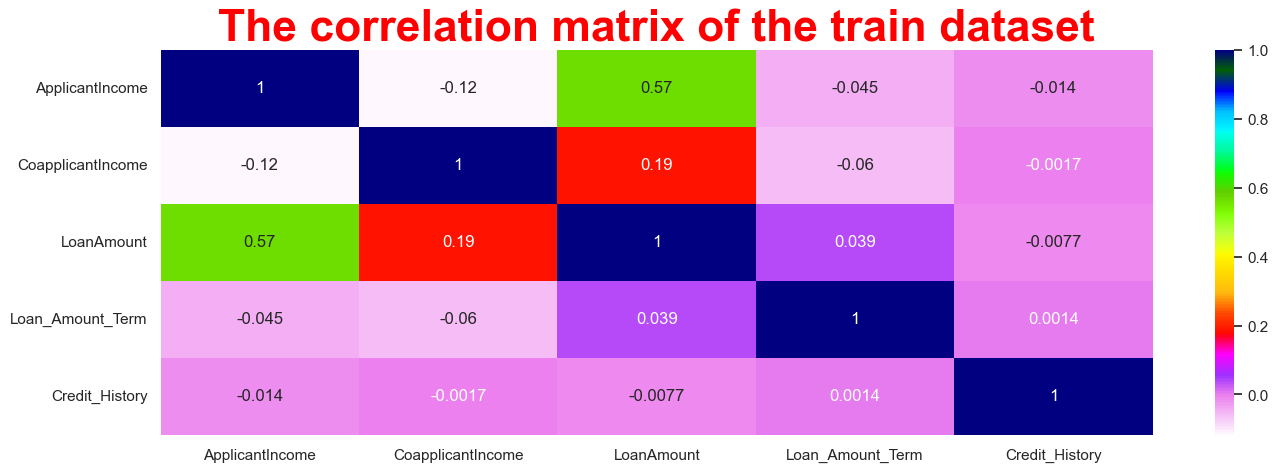

In [137]:
# Visualize the train dataset correlation matrix
sns.set(rc={'figure.figsize' :(16,5)})
sns.heatmap(train.corr(), annot = True, cmap='gist_ncar_r')
plt.title("The correlation matrix of the train dataset", fontsize =32, color='red', fontweight ='bold')

Text(0.5, 1.0, 'The correlation matrix of the test dataset')

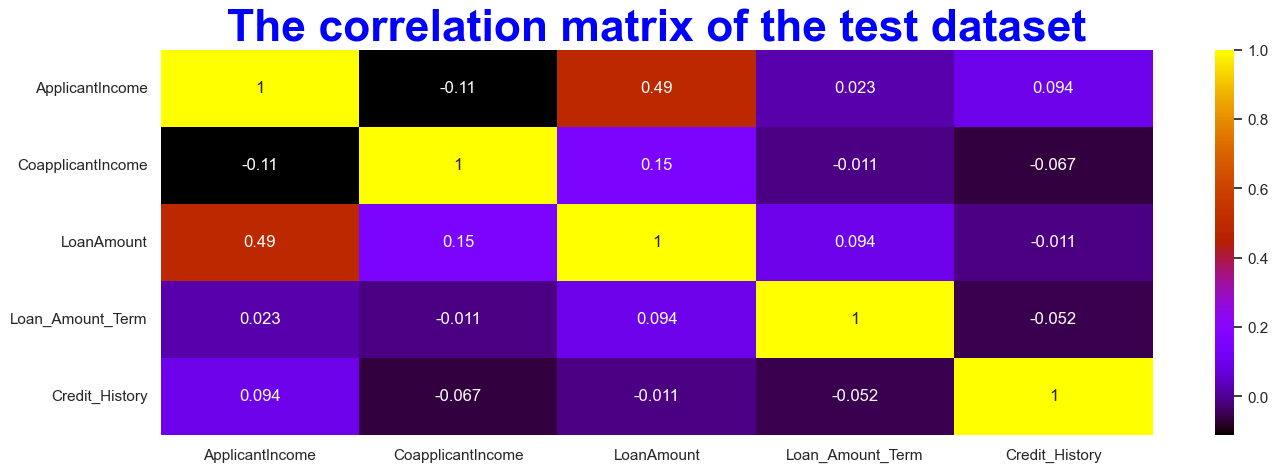

In [138]:
# visualize the train dataset correlation matrix
sns.set(rc ={"figure.figsize": (16,5)})
sns.heatmap(test.corr(), annot =True, cmap ='gnuplot')
plt.title("The correlation matrix of the test dataset", fontsize=32, color='Blue', fontweight ='bold')

## Exploratory Data Analysis (EDA)

**Exploratory DataAnalysis (EDA) is an approach to analysis the data using visual techniques. It is used to discover trends, patterns , or to check  assumptions with the help of statistical summary and graphical representations.**

In [139]:
## Training dataset columns
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>],
       [<AxesSubplot: title={'center': 'LoanAmount'}>,
        <AxesSubplot: title={'center': 'Loan_Amount_Term'}>],
       [<AxesSubplot: title={'center': 'Credit_History'}>,
        <AxesSubplot: >]], dtype=object)

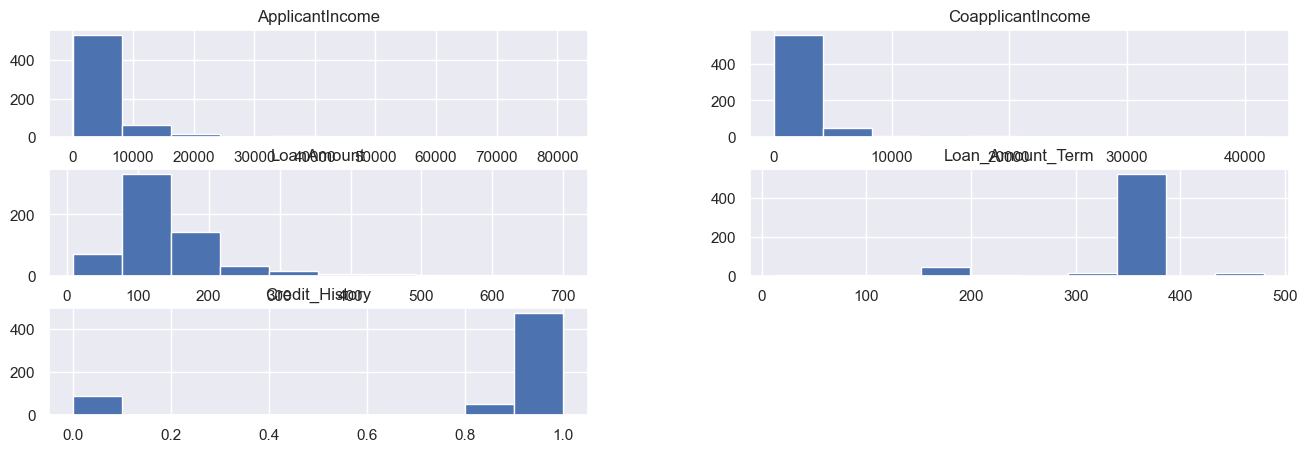

In [140]:
# Histogram using pandas
train.hist(figsize =(16,5))

<AxesSubplot: xlabel='Gender', ylabel='ApplicantIncome'>

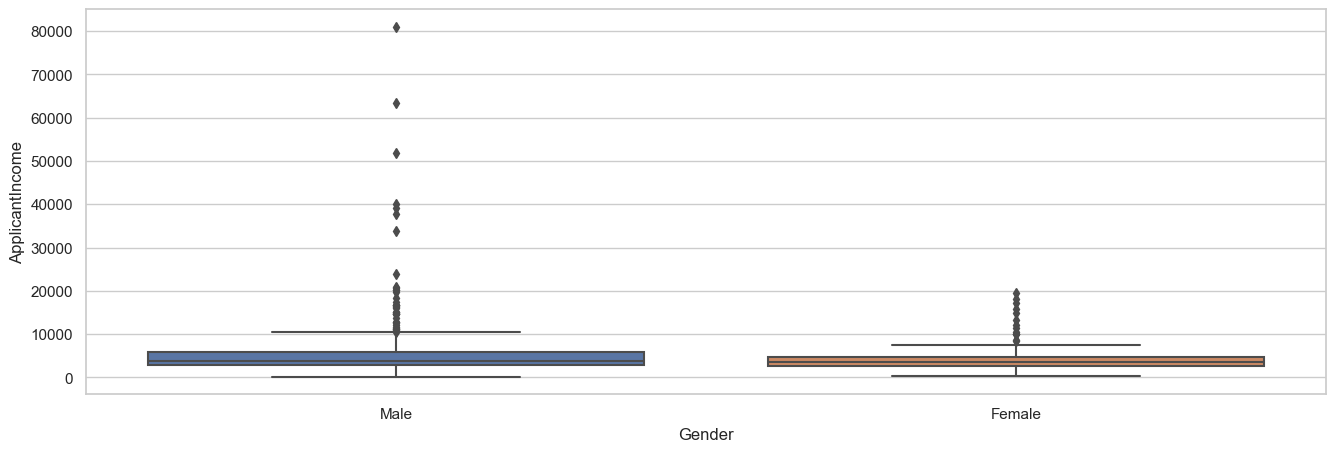

In [141]:
# draw vertical boxplot grouped
# by a categorical variable
sns.set_style("whitegrid")

sns.boxplot(x="Gender", y='ApplicantIncome', data =train)

<AxesSubplot: xlabel='Married', ylabel='ApplicantIncome'>

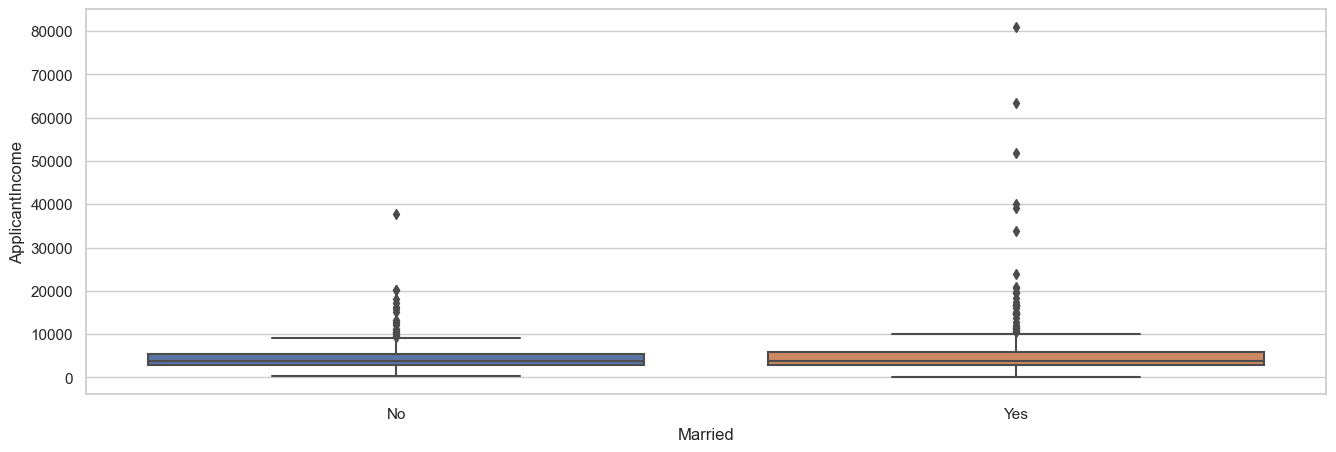

In [142]:
## Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style('whitegrid')

sns.boxplot(x ='Married', y ='ApplicantIncome', data =train)

<AxesSubplot: xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

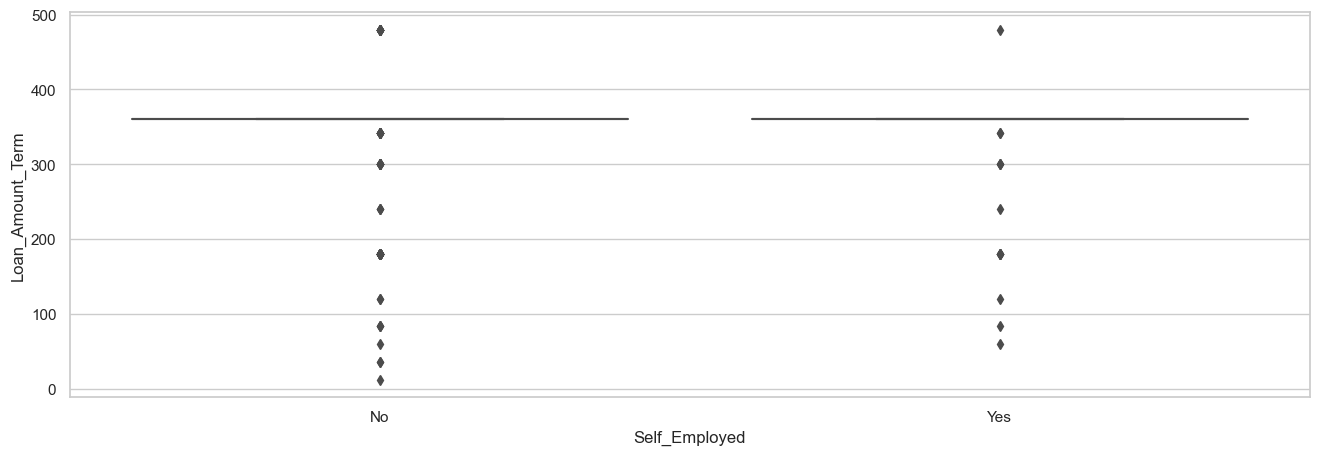

In [143]:
# Draw a vertical boxplot grouped
# by a categoricaL variable:
sns.set_style("whitegrid")
sns.boxplot(x='Self_Employed', y ='Loan_Amount_Term', data =train)

<AxesSubplot: xlabel='Property_Area', ylabel='LoanAmount'>

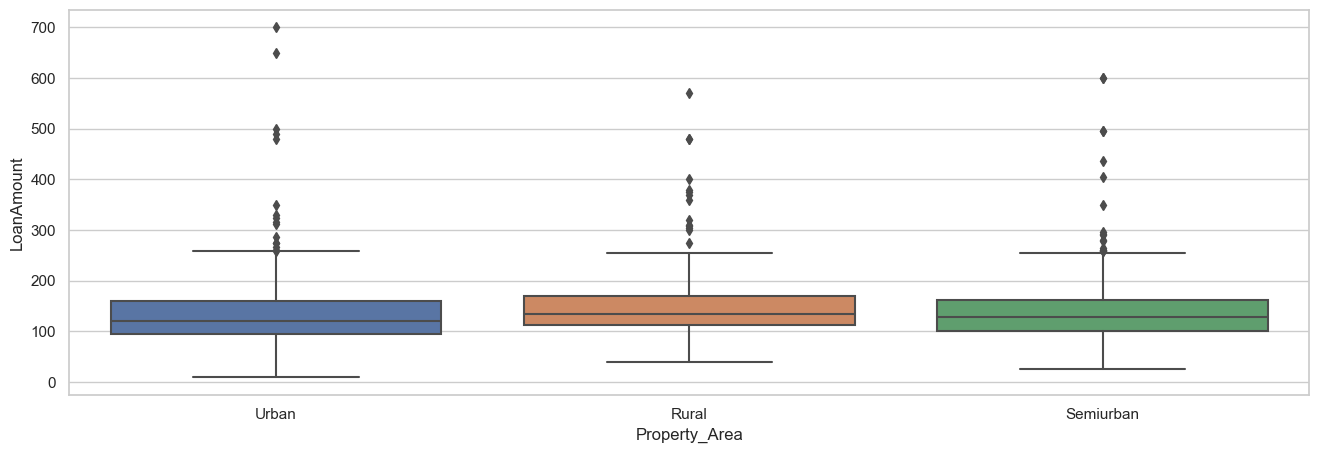

In [144]:
## Draw a vertical boxplot
# by categorical varibable
sns.set_style("whitegrid")

sns.boxplot(x ='Property_Area', y='LoanAmount', data = train)

In [145]:
# Check the education in the training dataset
education = train['Education'].value_counts()
# To visualize the above information using the plotly
fig = px.pie(values = education.values,
            names = education.index, 
            color_discrete_sequence = px.colors.sequential.Mint,
            title ='Education in the dataset', template='plotly_dark')

fig.update_traces(textinfo='label + percent + value', textfont_size =13,
                 marker =  dict(line = dict (color='#100000', width =0.2)))

fig.data[0].marker.line.width =2
fig.data[0].marker.line.color ='gray'
fig.show()

### Observation


**1. From the above pie chart we understand dataset education columns most person complete graduation**

In [146]:
# Check which gender have the most applicantIncome source in the data
fig = px.histogram(train, x='ApplicantIncome', color ='Gender', title='To visualize the applicantIncome with gender')
fig.update_layout(bargap =0.2, bargroupgap =0.1,
                 plot_bgcolor ='green')
fig.show()

## Observation

**1. From the above histogram the female average monthly income between 3000 dolors**

**2. The male average mopnthly income from the above histogram betweem 4000 dolors**

In [147]:
# to visualize the education wwith Property_Area using the
fig = px.histogram(train, x ='Education', color='Property_Area', title ='To visualize the Education wwith Property_Area')
fig.update_layout(bargap = 0.2, bargroupgap =0.1,
                 plot_bgcolor ='pink')
fig.show()

## Observation:

**1.From the above chart urban areas most people are graduate**

**2. Same as the above information Rural areas graduates percentage high and as the semiurban areas**

In [148]:
# To visualize the LoanAmount Using the plotly
fig = px.line(train, y='LoanAmount', title ='To visualize the LoanAmount')
fig.update_layout(bargap =0.2, bargroupgap =0.1,
                 plot_bgcolor ='yellow')
fig.show()

In [149]:
#To visualize the Loan_Amount_Term using the plotly 
fig = px.line(train,y="Loan_Amount_Term",color='Gender', title="To visualize the Loan_Amount_Term",color_discrete_sequence=['red','blue'])
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='black')

fig.show()

## Observation:

**1.Form the above countplot the male percentage is high in the dataset**

In [150]:
# To visualize countplot male percentage is high in the train dataset\
fig = px.histogram(train, x ='ApplicantIncome', color='Married', title="To visualize the Married with ApplicantIncome")
fig.update_layout(bargap =0.2, bargroupgap=0.1,
                 plot_bgcolor='grey')

fig.show()

In [151]:
# To visualize the LoanAmount in the in the dataset
loanamount = train.groupby(['ApplicantIncome','CoapplicantIncome']).size().reset_index().sort_values(by='ApplicantIncome',ascending =False)
fig = px.histogram(loanamount, x ='ApplicantIncome', y='CoapplicantIncome', title ='To visualize the CoapplicantIncome with ApplicantIncome')
fig.update_layout(bargap= 0.2, bargroupgap =0.1,
                 plot_bgcolor='black')

fig.show()

## Displot 

The displot represents the univariate distribution of data i.e. data distribution against
the density disbution.

<AxesSubplot: xlabel='LoanAmount'>

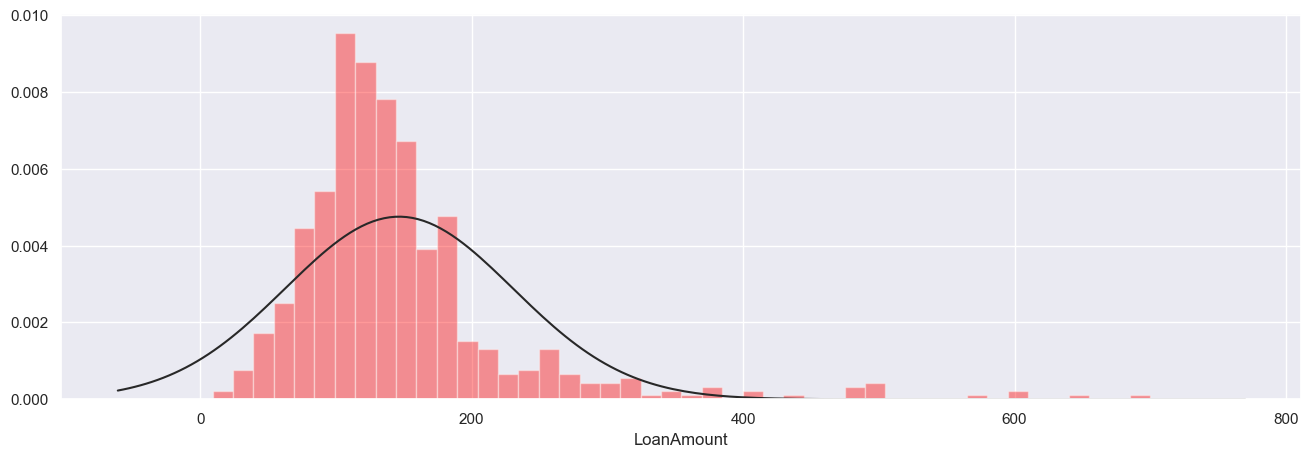

In [152]:
# import the norm from scipy
from scipy.stats import norm
# visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(train['LoanAmount'], fit = norm, kde=False, color ='Red')

<AxesSubplot: xlabel='ApplicantIncome'>

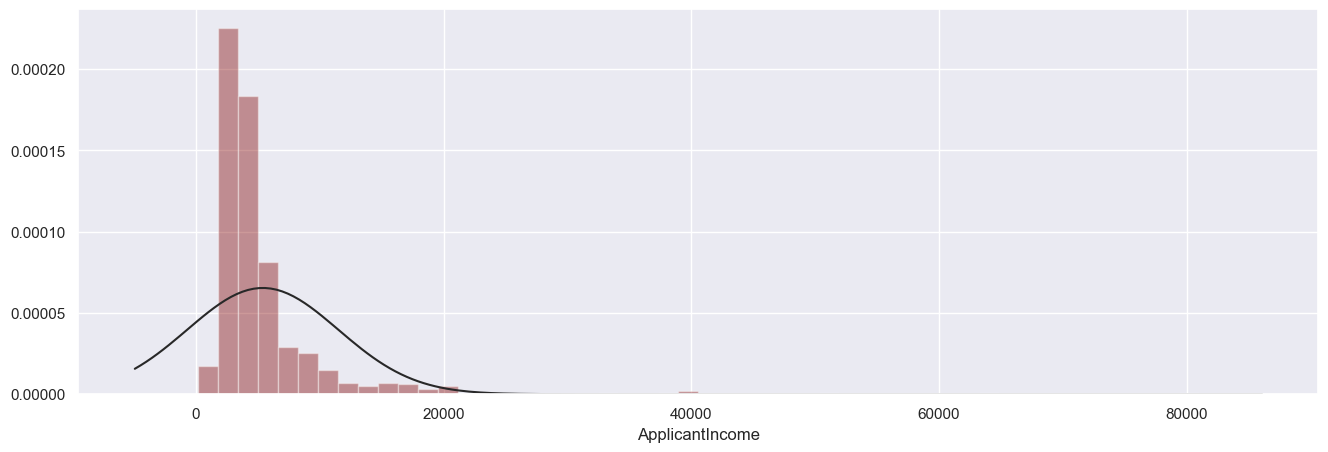

In [153]:
#Visualize the distplot ApplicantIncome with the prameters
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(train['ApplicantIncome'],fit=norm,kde=False,color='maroon')

ApplicantIncome


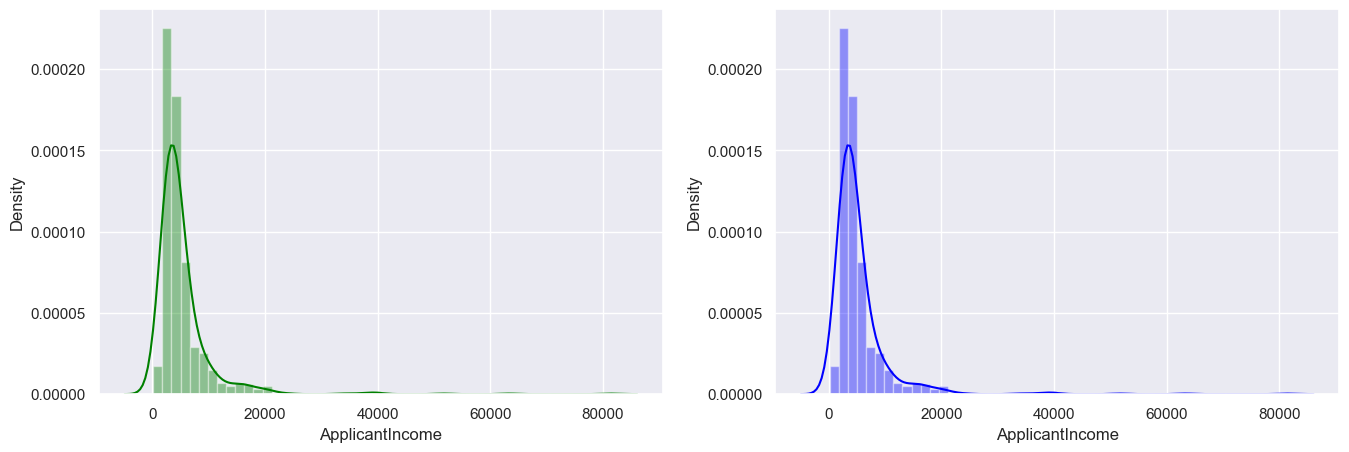

CoapplicantIncome


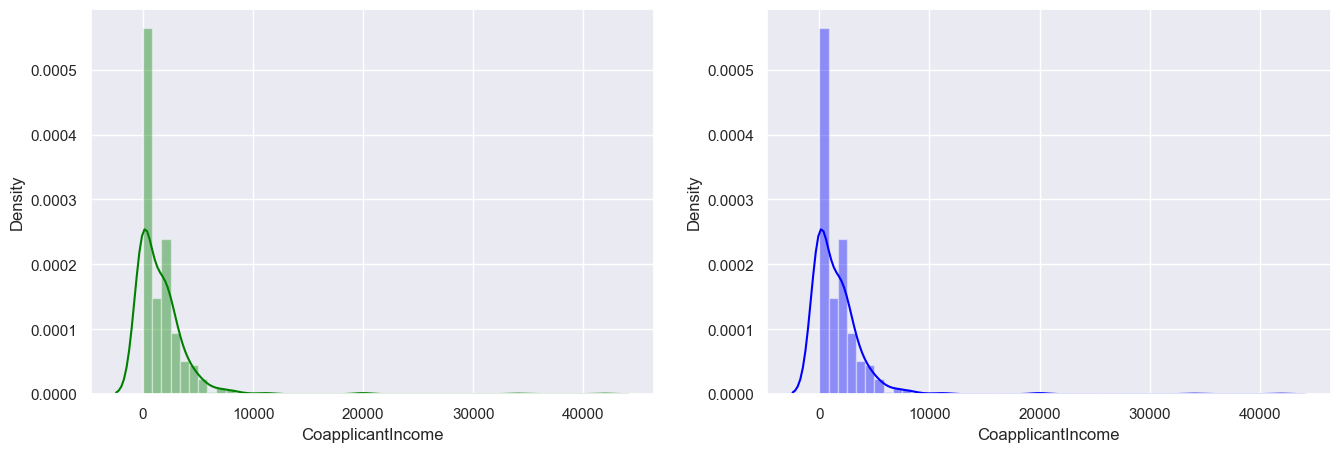

LoanAmount


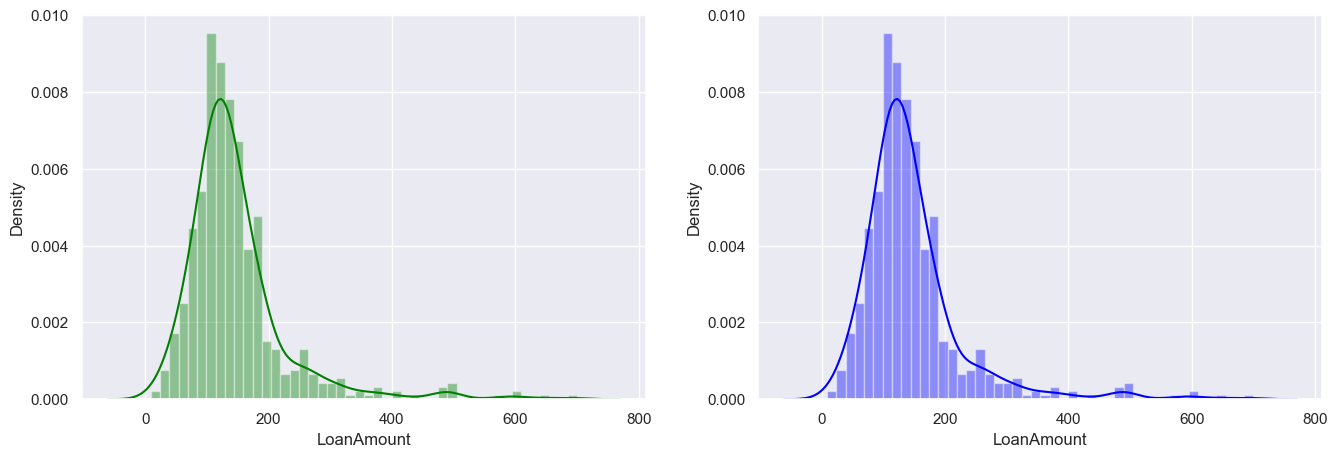

Loan_Amount_Term


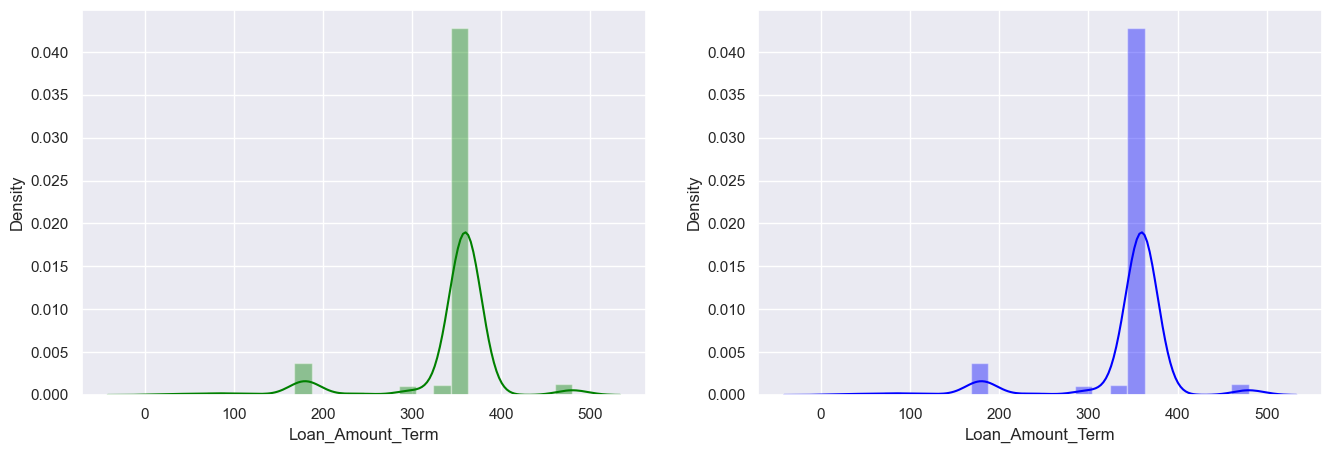

Credit_History


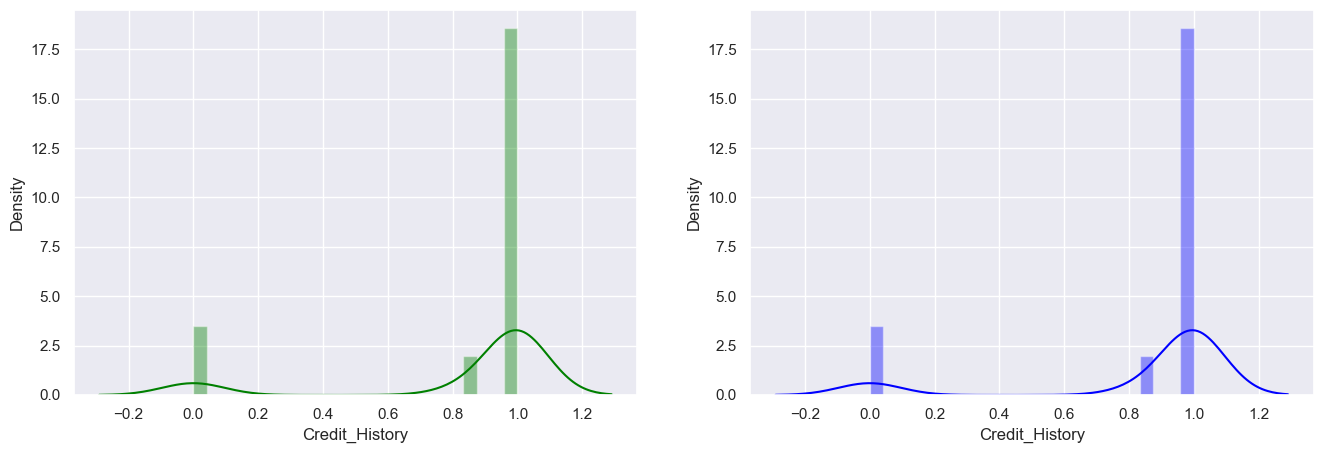

In [154]:
# Perform distribution the numerical columns in the to relationship between the two plot
# first we create the list for numerical columns
col = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History']]
# create a for Loop for the list columns and print it
for columns in col.columns:
    print(columns)
    # The create a subplots wwith the parameters
    fig, ax = plt.subplots(nrows=1, ncols =2, figsize=(16,5))
    # Create a distplot with color greens and axis sme as the another distplot with parmater and finally wisalisze it
    sns.distplot(train[columns], ax =ax[0], color='green', hist =True)
    sns.distplot(train[columns], ax= ax[1], color ='blue', hist =True)
    plt.show()

## Modeling 

In [155]:
#Firstly we convert the categorical data to numerical using the labelencoder
label=LabelEncoder()
train['Loan_ID']=label.fit_transform(train['Loan_ID'])
train['Gender']=label.fit_transform(train['Gender'])
train['Married']=label.fit_transform(train['Married'])
train['Dependents']=label.fit_transform(train['Dependents'])
train['Education']=label.fit_transform(train['Education'])
train['Self_Employed']=label.fit_transform(train['Self_Employed'])
train['Property_Area']=label.fit_transform(train['Property_Area'])
train['Loan_Status']=label.fit_transform(train['Loan_Status'])

In [156]:
# From the divided the data into two variables
X =train[['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount','Credit_History','CoapplicantIncome','Loan_Amount_Term']]
y = train['Loan_Status']

In [157]:
print(X.shape)
print(y.shape)

(614, 8)
(614,)


In [158]:
# Helper function dcaling all the numerical data using MinMaxScaler
# import array
# import MinmaxScaler
def scale_data(df,col):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range =(0,1))
    
    df[col] = scaler.fit_transform(df[col])
    
    return

In [159]:
# passing data and column name for scaling 
col_X = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount',
        'Loan_Amount_Term','Credit_History']
X = scale_data(X,col_X)
X =train.drop(['Loan_ID', 'Loan_Status'],axis =1)
# Print the X data
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression

In [161]:
# Install the Logisticregression
logistic = LogisticRegression()
# And fit the train data to the model
logistic.fit(X_train, y_train)
# Prediction of the test dataset
logistic_pred = logistic.predict(X_test)
logistic_pred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [162]:
len(logistic_pred)

154

In [163]:
# Check the test score and train score to the LineaRegression algorithm
print(f'The test_accuracy: {logistic.score(X_test, y_test)*100:.2f}')

# Train score for the data
print(f"The Train_accuracy: {logistic.score(X_train, y_train)*100:.2f}")
#print the accuracy_score of the logistics regression 
print(f'The accuracy_score: {accuracy_score(y_test, logistic_pred)*100:.2f}')

The test_accuracy: 77.92
The Train_accuracy: 81.96
The accuracy_score: 77.92


<function classification_report at 0x0000023EA5C13040> (350    1
377    1
163    1
609    1
132    1
      ..
535    1
468    1
582    1
291    0
75     0
Name: Loan_Status, Length: 154, dtype: int32, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]))


<AxesSubplot: >

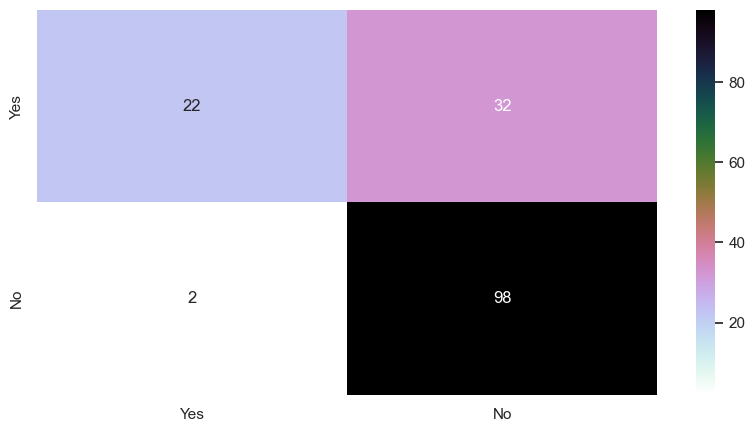

In [164]:
## Claaification_report and confussion_matrix of the LogisticsRession model
# Classifiactiob report
print(classification_report, (y_test, logistic_pred))
#confusion_matrix
cn = confusion_matrix(y_test, logistic_pred)
sns.set(rc={"figure.figsize":(10,5)})
sns.heatmap(cn, annot =True, cmap ='cubehelix_r', xticklabels=['Yes',"No"], yticklabels=['Yes','No'])

## DecisiontreeClassifier

In [165]:
# import the decisiontreeClassifier algorithm
from sklearn.tree import DecisionTreeClassifier
# Install the decisiontreeclassifier
tree = DecisionTreeClassifier()
# and fit the train data tp the model
tree .fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
# Prediction of the test dataset
tree_pred = tree.predict(X_test)
tree_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [167]:
# Check the test score and train score to the LinearRegression algorithm
print(f"The Test_accuracy:{tree.score(X_test, y_test)*100: .2f}")
# Train score for the data
print(f"The train_accuracy:{tree.score(X_train, y_train)*100:.2f}")
# print the accuracy_score of the logistics regression
print(f'The accuracy_score:{accuracy_score(y_test, tree_pred)*100:.2f}')

The Test_accuracy: 68.83
The train_accuracy:100.00
The accuracy_score:68.83


**Classifier_report and confusion_matrix of the DecisiontreeClassifier model**

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        54
           1       0.75      0.78      0.76       100

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



<AxesSubplot: >

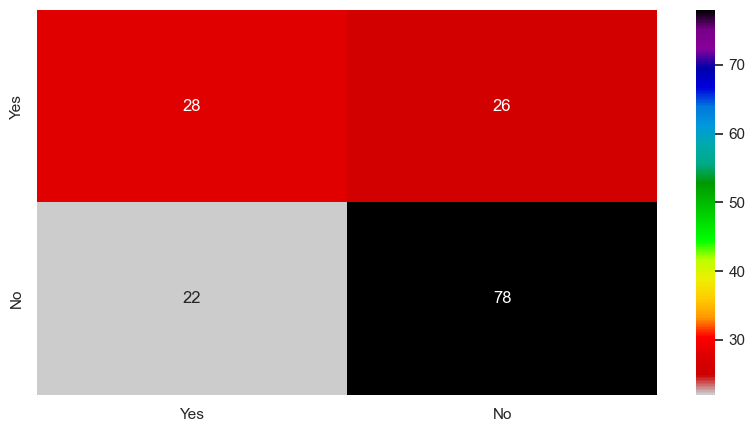

In [168]:
# Classifier report
print(classification_report(y_test, tree_pred))
#confussion_matrix
cn = confusion_matrix(y_test, tree_pred)
sns.set_rc={'figure.figsize':(10,5)}
sns.heatmap(cn, annot =True, cmap ='nipy_spectral_r', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])

## RandomForestClassifier

In [169]:
#install the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier
#install the model
random=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#fit the traing data to the radomforestclassifier algorithms
random.fit(X_train,y_train)

RandomForestClassifier(max_features=6)

In [170]:
random_pred = random.predict(X_test)
random_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

**Classification_report and confusion_matrix of the RandomForestclassifier model**

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        54
           1       0.76      0.91      0.83       100

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



<AxesSubplot: >

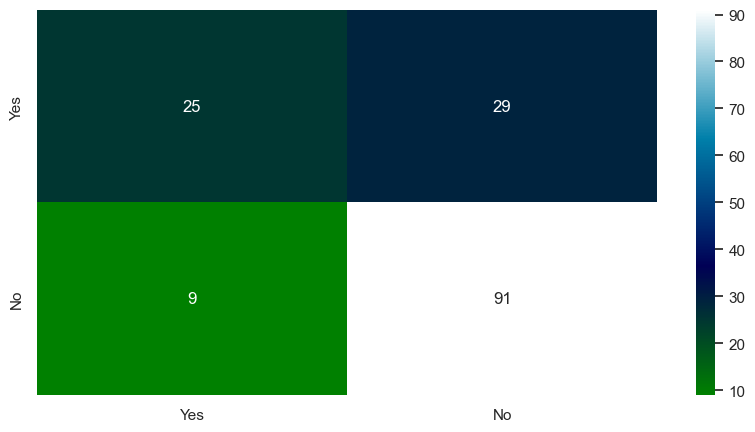

In [171]:
# Classification report
print(classification_report(y_test, random_pred))
#confusion_matrix
cn =confusion_matrix(y_test, random_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn, annot =True, cmap ='ocean', xticklabels=['Yes','No'], yticklabels =['Yes', 'No'])


# AdaBoostClassifier

In [172]:
#Import the AdaBosstClassifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Install the model
adam=AdaBoostClassifier()
#Fit the traiing data to the model
adam.fit(X_train,y_train)

AdaBoostClassifier()

In [173]:
#AdaBoostClassifier prediction to the dataset
adam_pred=adam.predict(X_test)
adam_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [174]:
#Check the test score and train score to the model
print(f'The AdaBoostClassifier model test score is {adam.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The AdaBoostClassifier model train scores is {adam.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The AdaBoostClassifier accuracy_score {accuracy_score(y_test,adam_pred)*100:.2f}')

The AdaBoostClassifier model test score is 76.62
The AdaBoostClassifier model train scores is 85.65
The AdaBoostClassifier accuracy_score 76.62


# Classification_report and confusion_matrix of the AdaBoostClassifier model

              precision    recall  f1-score   support

           0       0.78      0.46      0.58        54
           1       0.76      0.93      0.84       100

    accuracy                           0.77       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.77      0.77      0.75       154



<AxesSubplot: >

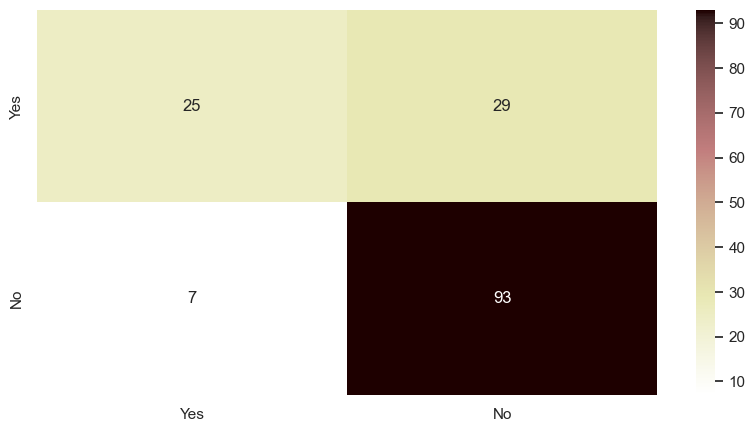

In [175]:
#Classification report
print(classification_report(y_test,adam_pred))
#confusion_matrix
cn=confusion_matrix(y_test,adam_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='pink_r',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

# XGBClassifier

In [176]:
#Install the XGBClassifier from the xgboost
from xgboost import XGBClassifier
#Install the XGBClassifier
xgb=XGBClassifier()
#Let's fit the traning data to the model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [177]:
#XGBClassifier prediction to the test dataset
xgb_pred=xgb.predict(X_test)
xgb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [178]:
#Check the test score and train score to the model
print(f'The XGBClassifier model test score is {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The XGBClassifier model train scores is {xgb.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The XGBClassifier accuracy_score {accuracy_score(y_test,xgb_pred)*100:.2f}')

The XGBClassifier model test score is 74.68
The XGBClassifier model train scores is 100.00
The XGBClassifier accuracy_score 74.68


              precision    recall  f1-score   support

           0       0.70      0.48      0.57        54
           1       0.76      0.89      0.82       100

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154



<AxesSubplot: >

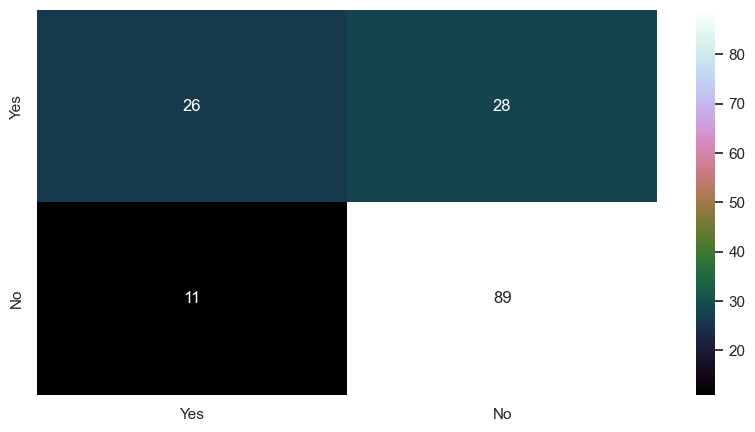

In [179]:
#Classification report
print(classification_report(y_test,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap='cubehelix',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

##  GaussianNB

In [180]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import GaussianNB
#install the model
gaussian=GaussianNB(var_smoothing=2e-15)
#fit the train data to our model
gaussian.fit(X_train,y_train)

GaussianNB(var_smoothing=2e-15)

In [181]:
#Prediction of the GaussianNB
gussian_pred=gaussian.predict(X_test)
gussian_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [182]:
#Check the test score and train score to the model
print(f'The GussianNB model test score is {gaussian.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The GussianNB model train scores is {gaussian.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The GussianNB accuracy_score {accuracy_score(y_test,gussian_pred)*100:.2f}')

The GussianNB model test score is 77.92
The GussianNB model train scores is 81.30
The GussianNB accuracy_score 77.92


# Classification_report and confusion_matrix of the GussianNB model

              precision    recall  f1-score   support

           0       0.88      0.43      0.57        54
           1       0.76      0.97      0.85       100

    accuracy                           0.78       154
   macro avg       0.82      0.70      0.71       154
weighted avg       0.80      0.78      0.75       154



<AxesSubplot: >

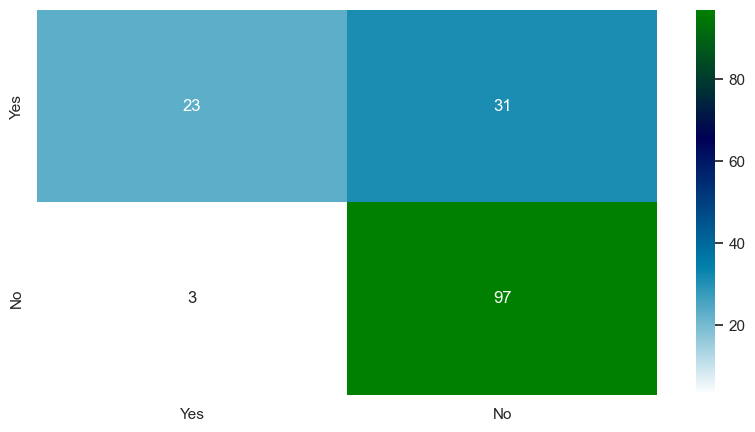

In [183]:
#Classification report
print(classification_report(y_test,gussian_pred))
#confusion_matrix
cn=confusion_matrix(y_test,gussian_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='ocean_r',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [184]:
#install the Kneighborsclassifier from the sklearn
from sklearn.neighbors import KNeighborsClassifier
#Install the KNeighborsClassifier
knn = KNeighborsClassifier()
#And the fit the training dataset
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [185]:
#Prediction of the KNeighborsClassifier
knn_pred=knn.predict(X_test)
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [186]:
#Check the test score and train score to the model
print(f'The KNeighborsClassifier model test score is {knn.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The KNeighborsClassifier model train scores is {knn.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The KNeighborsClassifier accuracy_score {accuracy_score(y_test,knn_pred)*100:.2f}')

The KNeighborsClassifier model test score is 58.44
The KNeighborsClassifier model train scores is 75.00
The KNeighborsClassifier accuracy_score 58.44


              precision    recall  f1-score   support

           0       0.29      0.13      0.18        54
           1       0.64      0.83      0.72       100

    accuracy                           0.58       154
   macro avg       0.47      0.48      0.45       154
weighted avg       0.52      0.58      0.53       154



<AxesSubplot: >

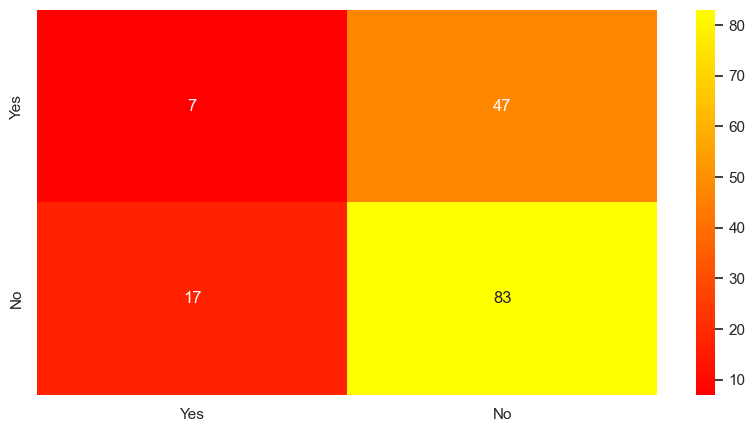

In [187]:
#Classification report
print(classification_report(y_test,knn_pred))
#confusion_matrix
cn=confusion_matrix(y_test,knn_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='autumn',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [188]:
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBR = GradientBoostingClassifier()


# fitting the model on train data

GBR.fit(X_train,y_train)

GradientBoostingClassifier()

In [189]:
#Prediction of the GradientBoostingClassifier
GBR_pred=GBR.predict(X_test)
GBR_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [190]:
#Check the test score and train score to the model
print(f'The GradientBoostingClassifier model test score is {GBR.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The GradientBoostingClassifier model train scores is {GBR.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The GradientBoostingClassifier accuracy_score {accuracy_score(y_test,GBR_pred)*100:.2f}')

The GradientBoostingClassifier model test score is 74.68
The GradientBoostingClassifier model train scores is 91.09
The GradientBoostingClassifier accuracy_score 74.68


              precision    recall  f1-score   support

           0       0.78      0.39      0.52        54
           1       0.74      0.94      0.83       100

    accuracy                           0.75       154
   macro avg       0.76      0.66      0.67       154
weighted avg       0.75      0.75      0.72       154



<AxesSubplot: >

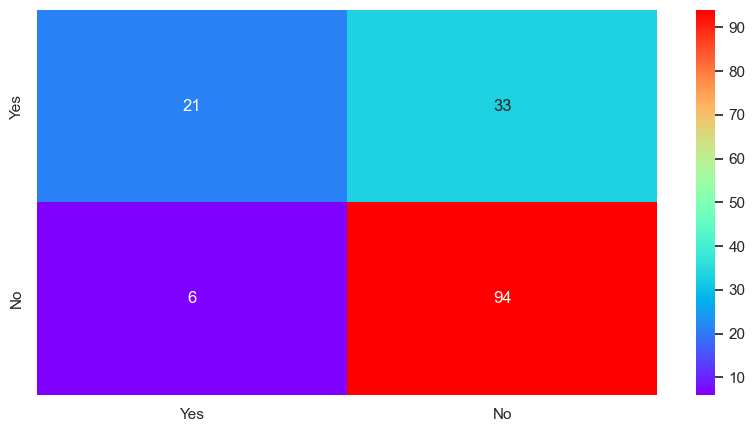

In [191]:
#Classification report
print(classification_report(y_test,GBR_pred))
#confusion_matrix
cn=confusion_matrix(y_test,GBR_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='rainbow',xticklabels=['Yes','No'],yticklabels=['Yes','No'])

### Classification_report and confusion_matrix ò the GrdientBoostingClassifier model

              precision    recall  f1-score   support

           0       0.78      0.39      0.52        54
           1       0.74      0.94      0.83       100

    accuracy                           0.75       154
   macro avg       0.76      0.66      0.67       154
weighted avg       0.75      0.75      0.72       154



<AxesSubplot: >

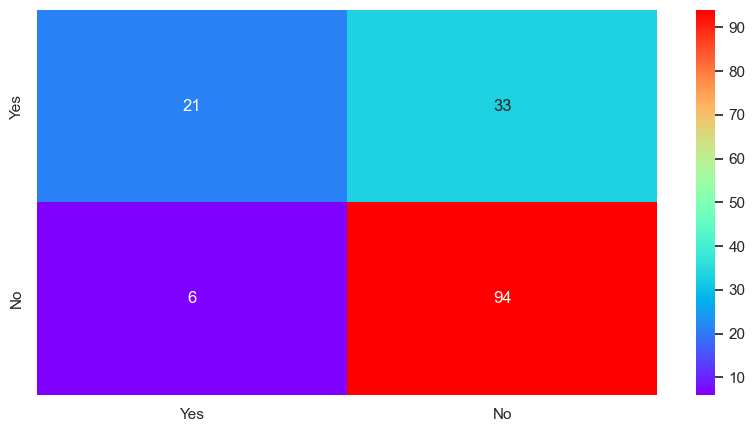

In [192]:
 # Classification report
print(classification_report(y_test,GBR_pred))
#confusion matrix
cn = confusion_matrix(y_test, GBR_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot =True, cmap='rainbow', xticklabels=['Yes','No'],yticklabels=['Yes','No'])


## Support vector classifier

In [193]:
# Fit a support vector classifier model to the train dataset
# import SVC
from sklearn.svm import SVC
# Instantiate the model
svc =SVC()
# fit hte model on train data
svc.fit(X_train, y_train)

SVC()

In [194]:
# Prediction of the support vector classifier
svc_pred = svc.predict(X_test)
svc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [195]:
#Check the test score and train score to the model
print(f'The support vector classifier model test score is {svc.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The support vector classifier model train scores is {svc.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The support vector classifier accuracy_score {accuracy_score(y_test,svc_pred)*100:.2f}')

The support vector classifier model test score is 64.94
The support vector classifier model train scores is 70.43
The support vector classifier accuracy_score 64.94


### Classification_report and confusion matrix of the support vector classifier model

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



<AxesSubplot: >

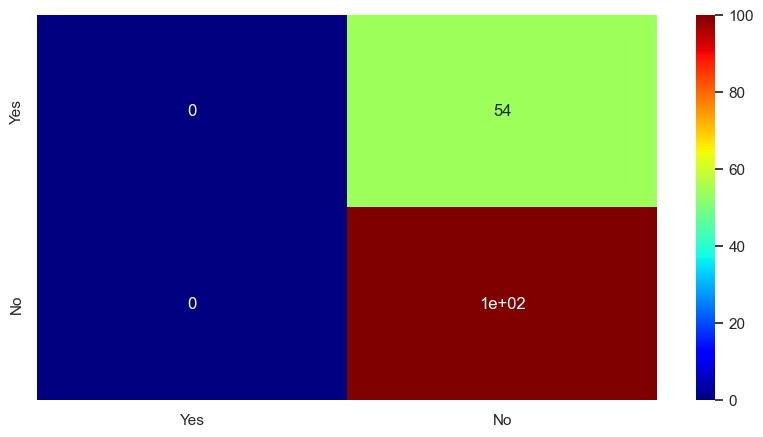

In [196]:
# classification report
print(classification_report(y_test, svc_pred))
# confussion_matrix
cn = confusion_matrix(y_test, svc_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn, annot =True, cmap='jet', xticklabels=['Yes','No'],yticklabels=['Yes','No'] )

## CatBoostClassifier

In [197]:
#Install the CatBoostClassifier
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=40, 
    learning_rate=0.1, 
    loss_function='CrossEntropy',
    feature_border_type='UniformAndQuantiles'
)
#fit the traing data to the CatBoostClassifier
clf.fit(X_train,y_train)

0:	learn: 0.6618959	total: 2.05ms	remaining: 79.8ms
1:	learn: 0.6360759	total: 4.27ms	remaining: 81.2ms
2:	learn: 0.6090355	total: 4.88ms	remaining: 60.2ms
3:	learn: 0.5869450	total: 5.61ms	remaining: 50.5ms
4:	learn: 0.5695313	total: 6.95ms	remaining: 48.7ms
5:	learn: 0.5567318	total: 8.09ms	remaining: 45.9ms
6:	learn: 0.5408732	total: 8.46ms	remaining: 39.9ms
7:	learn: 0.5277947	total: 9.12ms	remaining: 36.5ms
8:	learn: 0.5179833	total: 10.2ms	remaining: 35.2ms
9:	learn: 0.5076801	total: 11.5ms	remaining: 34.5ms
10:	learn: 0.4998816	total: 12.9ms	remaining: 33.9ms
11:	learn: 0.4929340	total: 14.4ms	remaining: 33.6ms
12:	learn: 0.4870086	total: 15.8ms	remaining: 32.8ms
13:	learn: 0.4816545	total: 17.3ms	remaining: 32.1ms
14:	learn: 0.4756301	total: 18.7ms	remaining: 31.1ms
15:	learn: 0.4710681	total: 20.3ms	remaining: 30.5ms
16:	learn: 0.4667905	total: 21.2ms	remaining: 28.6ms
17:	learn: 0.4624468	total: 22.6ms	remaining: 27.6ms
18:	learn: 0.4585018	total: 24.2ms	remaining: 26.7ms
19:

In [198]:
# Prediction of the CatBosst Classifier
clf_pred = clf.predict(X_test)

In [199]:
#Check the test score and train score to the model
print(f'The CatBoostClassifier model test score is {clf.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The CatBoostClassifier model train scores is {clf.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The CatBoostClassifier accuracy_score {accuracy_score(y_test,clf_pred)*100:.2f}')

The CatBoostClassifier model test score is 77.27
The CatBoostClassifier model train scores is 82.17
The CatBoostClassifier accuracy_score 77.27


**Classification_report and confusionmatrix of the CatBoostClassifier model**

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



<AxesSubplot: >

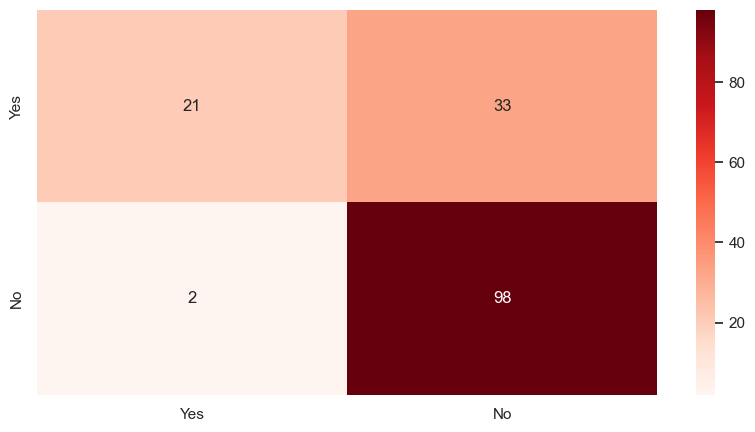

In [200]:
# Classification report
print(classification_report(y_test, clf_pred))
# confusion matrix
cn = confusion_matrix(y_test, clf_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn, annot =True, cmap='Reds', xticklabels=['Yes','No'],yticklabels=['Yes','No'])

In [201]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  
  #fit on train
  random.fit(X_train,y_train)
  # print best_params_
  print(random.best_params_)
  

**Random_forest**

In [202]:
#Create parameters dict for turning
rf_para_grid = {
    "n_estimators":[10,100,1000],
    "max_features":['sqrt','log2']
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'n_estimators': 1000, 'max_features': 'log2'}


**KNN param**

In [203]:
# create parameters dict for tunning
knn_para_grid = {
                  'n_neighbors' : range(1, 21, 2),
                  'weights' : ['uniform', 'distance'],
                  'metric' :['euclidean', 'manhattan', 'minkowski']
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(KNeighborsClassifier(),X_train, y_train,param_grid=knn_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'weights': 'uniform', 'n_neighbors': 17, 'metric': 'manhattan'}


**DecisionTree**

In [204]:
# create parameters dict for turning
from scipy.stats import randint
DTR_para_grid ={
            "max_depth":[3,None],
            "max_features":randint(1,9),
            "min_samples_leaf":randint(1,9),
            'criterion' :['gini','entropy']
}
random_Search(DecisionTreeClassifier(),X_train,y_train, param_grid=DTR_para_grid)
DecisionTreeClassifier()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}


DecisionTreeClassifier()

**AdaBoost**

In [205]:
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300,500],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(AdaBoostClassifier(),X_train, y_train,param_grid=Ada_para_grid)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'n_estimators': 100, 'learning_rate': 0.001}


**SVC**

In [206]:
# Create parameters dict for turning
svc_para_grid ={
          'kernel':['poly','rbf','sigmoid'],
            'C':[50,10,1.0,0.01],
            'gamma':['scale']
}
# passing data for hyper parameter tunning with randomsized search CV
random_Search(SVC(), X_train, y_train, param_grid=svc_para_grid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'kernel': 'poly', 'gamma': 'scale', 'C': 0.01}


**XGB**


In [207]:
XGB_para_grid ={'learning_rate' :[0.05, 0.1],
                "max_depth"        : [ 3, 4, 5,10],
                 "min_child_weight" : [ 3, 5, 7,20 ],
                 "gamma"            : [ 0.0, 0.1],
                 "colsample_bytree" : [ 0.3, 0.4]
               }
# passing data for hyper parameter tunning with Randomsized search CV
random_Search(XGBClassifier(),X_train,y_train,param_grid = XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.4}


**DecisionTree**

In [208]:
#install the decisiontreeclassifier
tree1=DecisionTreeClassifier(**{'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 1}


)
#and fit the traindata to the model
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=5)

In [209]:
#After the hyperparameter turning the decisiontree prediction
tree1_pred=tree1.predict(X_test)

In [210]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {tree1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree1.score(X_train,y_train)*100:.2f}')
#print the accuracy_score of the logistic regression
print(f'The accuracy_score: {accuracy_score(y_test,tree1_pred)*100:.2f}')

The Test_accuracy: 77.27
The Train_accuracy: 82.83
The accuracy_score: 77.27


**Random Forest**

In [211]:
#install the model
random1=RandomForestClassifier(**{'n_estimators': 1000, 'max_features': 'log2'})
#fit the traing data to the radomforestclassifier algorithms
random1.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=1000)

In [212]:
#Prediction
random1_pred=random1.predict(X_test)
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {random1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random1.score(X_train,y_train)*100:.2f}')
#print the accuracy_score of the logistic regression
print(f'The accuracy_score: {accuracy_score(y_test,random1_pred)*100:.2f}')

The Test_accuracy: 77.92
The Train_accuracy: 100.00
The accuracy_score: 77.92


**adaBoost**

In [213]:
#Install the model
adam1=AdaBoostClassifier(**{'n_estimators': 100, 'learning_rate': 0.001})
#Fit the traiing data to the model
adam1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=100)

In [214]:
#Prediction
adam1_pred=adam1.predict(X_test)
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {adam1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {adam1.score(X_train,y_train)*100:.2f}')
#print the accuracy_score of the logistic regression
print(f'The accuracy_score: {accuracy_score(y_test,adam1_pred)*100:.2f}')

The Test_accuracy: 77.27
The Train_accuracy: 82.17
The accuracy_score: 77.27


**SupportVector Machine**

In [215]:
svc1=SVC(**{'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1})
#Fit the traiing data to the model
svc1.fit(X_train,y_train)

SVC(C=0.1)

In [216]:
#Prediction
svc1_pred=svc1.predict(X_test)
#Check the test score and train score to the model
print(f'The support vector classifier model test score is {svc.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The support vector classifier model train scores is {svc.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The support vector classifier accuracy_score {accuracy_score(y_test,svc1_pred)*100:.2f}')

The support vector classifier model test score is 64.94
The support vector classifier model train scores is 70.43
The support vector classifier accuracy_score 64.94


**XGBClassisier**

In [217]:
#Install the XGBClassifier
xgb1=XGBClassifier(**{'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.4}

)
#Let's fit the traning data to the model
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [218]:
#Prediction
xgb1_pred=xgb1.predict(X_test)
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {xgb1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb1.score(X_train,y_train)*100:.2f}')
#print the accuracy_score of the logistic regression
print(f'The accuracy_score: {accuracy_score(y_test,xgb1_pred)*100:.2f}')

The Test_accuracy: 77.92
The Train_accuracy: 82.17
The accuracy_score: 77.92


**KNeighborsClassifier**

In [219]:
#Install the KNeighborsClassifier
knn1 = KNeighborsClassifier(**{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'minkowski'})
#And the fit the training dataset
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [220]:
#Prediction
knn1_pred=knn1.predict(X_test)
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {knn1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {knn1.score(X_train,y_train)*100:.2f}')
#print the accuracy_score of the logistic regression
print(f'The accuracy_score: {accuracy_score(y_test,knn1_pred)*100:.2f}')

The Test_accuracy: 61.04
The Train_accuracy: 72.61
The accuracy_score: 61.04


In [234]:
#now we create the prediction to the test dataset
X_test=test.drop(['Loan_ID'],axis=1)
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [235]:
#Now we convert the all categorical columns to numerical columns in the test dataset
X_test['Gender']=label.fit_transform(test['Gender'])
X_test['Married']=label.fit_transform(test['Married'])
X_test['Dependents']=label.fit_transform(test['Dependents'])
X_test['Education']=label.fit_transform(test['Education'])
X_test['Self_Employed']=label.fit_transform(test['Self_Employed'])
X_test['Property_Area']=label.fit_transform(test['Property_Area'])


In [240]:
prediction = logistic.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [237]:
len(prediction)

367

In [238]:
submission=pd.DataFrame({'Loan_ID':loan_id,'prediction':prediction})
submission.to_csv('Loan_prediction_3.csv',index=False)